In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns



In [ ]:
# TBC duomenys
# https://data.gov.lt/datasets/2871/

# (tuberkulioze – rūkymas, gėrimas,
# lytis, TLK kodas, mirties data)

# Ar yra priklausomybė tarp gyvenimo
# trukmės ir TBC žalingų įpročių? Pateikite TBC sergančiųjų
# duomenų apžvalgą: pasiskirstymas pagal lytį, amžių,
# rūkymo/alkoholio vart. stažą. Parašykite skriptą, kuris
# prognozuotų tikėtiną paciento gyvenimo trukmę.


In [3]:
tubdf = train = pd.read_csv('../../../eismas/TubPacientoZalingasIprotis.csv')
tubdf.head(2)

,_type,_id,_revision,_page.next,paciento_id,paciento_vardas,paciento_pavarde,paciento_gim_data,paciento_asmens_kodas,vda_ak_validacija,...,rukymas_id,rukymas_reiksme,rukymo_stazas_id,rukymo_stazas_reiksme,alkoholis_id,alkoholis_reiksme,vda_ligos_kodai,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d
0,datasets/gov/santara/tub_pacientu_zalingi_ipro...,da2bbb1c-2884-48bc-bdfd-19b27ff97025,76cab5cc-7551-4c30-8df1-537f5c036a5a,NaN,000254ba808ae65,7a0f681b673018a,2a925dd8f6a43f2,cf71c293a267455,2e0500a37929dcc,Tinkamas,...,2.0,11-20 cigarečių per dieną,3.0,11 - 20 metų,1.0,Nevartoja,A15d,A15d,NaN,NaN
1,datasets/gov/santara/tub_pacientu_zalingi_ipro...,eb2639f9-29b6-4d6c-888b-5eb2506dbb19,c3d871f4-5b93-4d88-aaae-0a6e9fe7daf3,NaN,0002a198424b859,d69d675af2a2fef,743a21b9b51c547,565e6a3a976e20a,aa6024f3d69f070,Tinkamas,...,4.0,Nerūko,0.0,NaN,2.0,Vartoja retai,A19.1,A19.1,NaN,NaN


In [11]:
tubmir = tubdf[tubdf['mirties_nuo_tub_d'].notnull()]
tubmir.head(2)

,_type,_id,_revision,_page.next,paciento_id,paciento_vardas,paciento_pavarde,paciento_gim_data,paciento_asmens_kodas,vda_ak_validacija,...,rukymas_id,rukymas_reiksme,rukymo_stazas_id,rukymo_stazas_reiksme,alkoholis_id,alkoholis_reiksme,vda_ligos_kodai,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d
5,datasets/gov/santara/tub_pacientu_zalingi_ipro...,cb0f7822-8519-40bb-96a7-c7d405a1f78a,09802fd8-acfc-48fb-bed3-3e6743179d47,NaN,0005809b95c1312,9eb1b54d0957f7e,a291729a59db924,b043d19ee0427c5,802e6bf941f88d3,Tinkamas,...,4.0,Nerūko,NaN,NaN,2.0,Vartoja retai,A15,A15,True,2003-05-01
7,datasets/gov/santara/tub_pacientu_zalingi_ipro...,afb99b2d-2562-474b-b6aa-08410aa9b5be,4f08bce0-5c5b-40b6-94fe-ffe942ddeedd,NaN,00068dce2ac554f,e4819b392857f91,6a9d7217f22be0a,b73343f89dadc3a,e721deb0b137a2a,Tinkamas,...,2.0,11-20 cigarečių per dieną,4.0,Virš 20 metų,3.0,Girtauja,A16d;A15.1d,A15.1d,False,2007-01-28


In [12]:
tubmir.columns

Index(['_type', '_id', '_revision', '_page.next', 'paciento_id',
       'paciento_vardas', 'paciento_pavarde', 'paciento_gim_data',
       'paciento_asmens_kodas', 'vda_ak_validacija',
       'vda_paciento_gim_metai_ak', 'paciento_gim_metai',
       'vda_paciento_lytis_ak', 'paciento_lytis', 'rukymas_id',
       'rukymas_reiksme', 'rukymo_stazas_id', 'rukymo_stazas_reiksme',
       'alkoholis_id', 'alkoholis_reiksme', 'vda_ligos_kodai', 'ligos_kodas',
       'ar_mire_nuo_tub', 'mirties_nuo_tub_d'],
      dtype='object')

In [13]:
# Convert to datetime format
tubmir['paciento_gim_metai'] = pd.to_datetime(tubmir['paciento_gim_metai'])
tubmir['mirties_nuo_tub_d'] = pd.to_datetime(tubmir['mirties_nuo_tub_d'])

In [15]:
tubmir['amzius'] = tubmir['mirties_nuo_tub_d'].dt.year - tubmir['paciento_gim_metai'].dt.year
tubmir.head(2)

,_type,_id,_revision,_page.next,paciento_id,paciento_vardas,paciento_pavarde,paciento_gim_data,paciento_asmens_kodas,vda_ak_validacija,...,rukymas_reiksme,rukymo_stazas_id,rukymo_stazas_reiksme,alkoholis_id,alkoholis_reiksme,vda_ligos_kodai,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d,amzius
5,datasets/gov/santara/tub_pacientu_zalingi_ipro...,cb0f7822-8519-40bb-96a7-c7d405a1f78a,09802fd8-acfc-48fb-bed3-3e6743179d47,NaN,0005809b95c1312,9eb1b54d0957f7e,a291729a59db924,b043d19ee0427c5,802e6bf941f88d3,Tinkamas,...,Nerūko,NaN,NaN,2.0,Vartoja retai,A15,A15,True,2003-05-01,79
7,datasets/gov/santara/tub_pacientu_zalingi_ipro...,afb99b2d-2562-474b-b6aa-08410aa9b5be,4f08bce0-5c5b-40b6-94fe-ffe942ddeedd,NaN,00068dce2ac554f,e4819b392857f91,6a9d7217f22be0a,b73343f89dadc3a,e721deb0b137a2a,Tinkamas,...,11-20 cigarečių per dieną,4.0,Virš 20 metų,3.0,Girtauja,A16d;A15.1d,A15.1d,False,2007-01-28,56


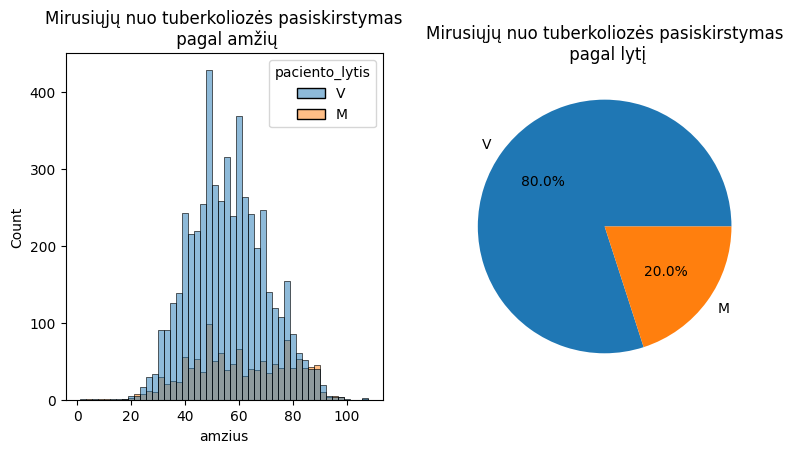

In [32]:
lytis_mire = tubmir['paciento_lytis'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5))
sns.histplot(data=tubmir, x='amzius', hue='paciento_lytis', ax=ax1)
ax2.pie(lytis_mire.values, labels=lytis_mire.index, autopct='%1.1f%%')
ax1.set_title('Mirusiųjų nuo tuberkoliozės pasiskirstymas\n pagal amžių')
ax2.set_title('Mirusiųjų nuo tuberkoliozės pasiskirstymas\n pagal lytį')
plt.show()

paciento_lytis
V    35769
M    16368
Name: count, dtype: int64


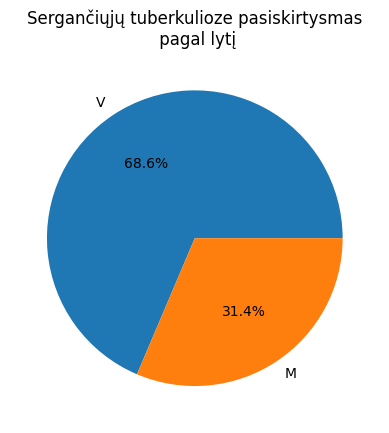

In [33]:
lytis_serga = tubdf['paciento_lytis'].value_counts()
print(lytis_serga)
plt.pie(lytis_serga.values, labels=lytis_serga.index, autopct='%1.1f%%' )
plt.title('Sergančiųjų tuberkulioze pasiskirtysmas\n pagal lytį')
plt.show()

In [34]:
data = {
    'Lytis': ['V', 'M'],
    'Visi': [lytis_serga['V'], lytis_serga['M']], # sergatys pacientai pgal lyti
    'Mire': [lytis_mire['V'], lytis_mire['M']]
}
lytisdf = pd.DataFrame(data)

# mirštamumo procentas
lytisdf['mir_proc'] = round(((lytisdf['Mire'] / lytisdf['Visi']) * 100), 2)
lytisdf.head()

,Lytis,Visi,Mire,mir_proc
0,V,35769,5141,14.37
1,M,16368,1287,7.86


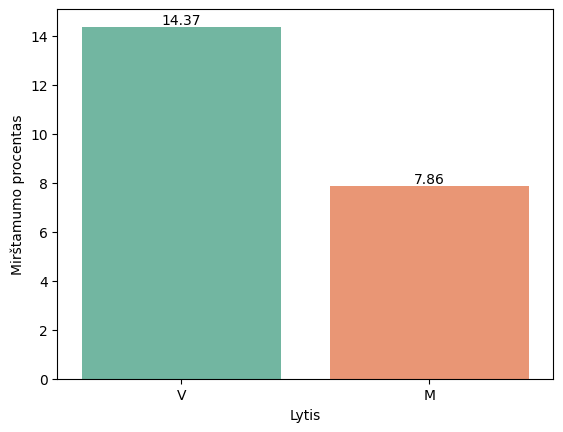

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x='Lytis', y='mir_proc', data=lytisdf, palette='Set2')
plt.ylabel('Mirštamumo procentas')
for i in ax.containers:
    ax.bar_label(i)
plt.show()
# Vyrų mirštamumas yra beveik du kartus didesnis nei moterų mirštamumas

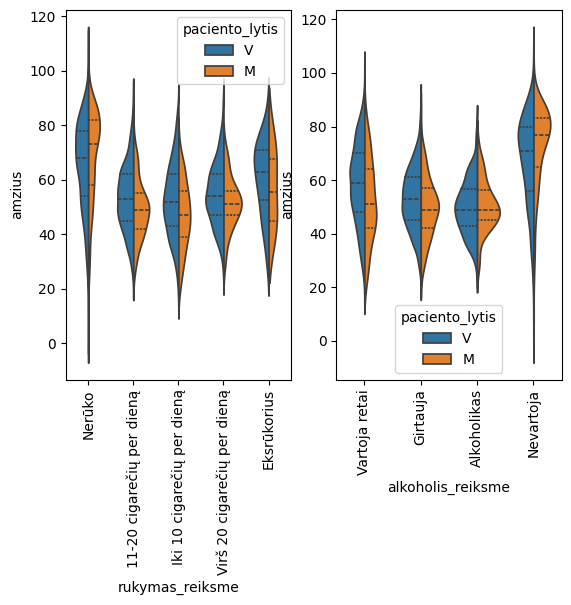

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.violinplot(data=tubmir, y='amzius', x='rukymas_reiksme', hue='paciento_lytis', split=True, inner="quart", ax=ax1)
sns.violinplot(data=tubmir, y='amzius', x='alkoholis_reiksme', hue='paciento_lytis', split=True, inner="quart", ax=ax2)
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)